# Исследование надежности заемщиков

# Описание проекта

Заказчик — кредитный отдел банка - предоставил статистику о платёжеспособности клиентов. Нужно проанализировать эти данные и выявить зависимость семейного положения и наличия детей у клиента на факт погашения кредита в срок.

Полученные результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных**
- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

## Загрузка данных

**Откроем таблицу и изучим общую информацию о данных**

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('/credibility_borrowers/data.csv')

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Таблица содержит 21525 записей, 12 колонок. В столбцах `days_employed` и `total_income` имеются пропуски.

## Предобработка данных

 ### Удаление пропусков и обработка аномальных значений

In [6]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Один столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца `income_type`.

In [7]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

В данных встречаются артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.

In [8]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведим медианное значение трудового стажа `days_employed` в днях.

In [9]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится вам для исследования.

Выведите перечень уникальных значений столбца `children`.

In [10]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [12]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.

In [13]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены.

In [14]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный.

In [15]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведём их к нижнему регистру. Проверим остальные столбцы.

In [16]:
data['education'] = data['education'].str.lower()

Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.

In [17]:
data.duplicated().sum()

71

In [18]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используем собственную функцию с именем `categorize_income()` и метод `apply()`.

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.

Используем собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучим данные в столбце `purpose` и определим, какие подстроки помогут нам правильно определить категорию.

In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Исследуем данные.

#### Изучим зависимость между количеством детей и возвратом кредита в срок.

In [24]:
data.groupby('children')['debt'].agg(['count', 'mean'])

,count,mean
children,,
0,14091,0.075438
1,4808,0.092346
2,2052,0.094542
3,330,0.081818
4,41,0.097561
5,9,0.000000


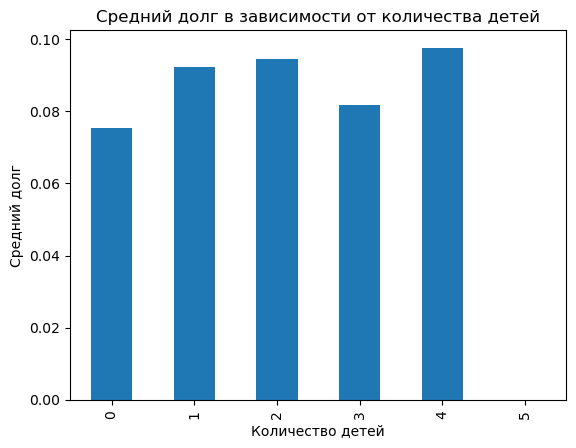

In [25]:
ax = data.groupby('children')['debt'].mean().plot(kind='bar')
ax.set_xlabel('Количество детей')
ax.set_ylabel('Средний долг')
ax.set_title('Средний долг в зависимости от количества детей');

**Вывод:** Зависимость между количеством детей и возвратом кредита в срок незначительна. Можно выделить бездетных, у которых процент должников немного меньше, чем у людей с детьми в количестве от одного до четырех; заемщиков с 4-мя детьми - у них процент должников меньше, чем у людей с 1, 2 и 4 детьми. Отдельно нужно отметить заемщиков с пятью детьми, в этой категории должников нет, но количество этих заёмщиков совсем незначительно. 

#### Посмотрим зависимость между семейным положением и возвратом кредита в срок.

In [26]:
data.groupby('family_status')['debt'].agg(['count', 'mean'])

,count,mean
family_status,,
Не женат / не замужем,2796,0.097639
в разводе,1189,0.070648
вдовец / вдова,951,0.066246
гражданский брак,4134,0.093130
женат / замужем,12261,0.075606


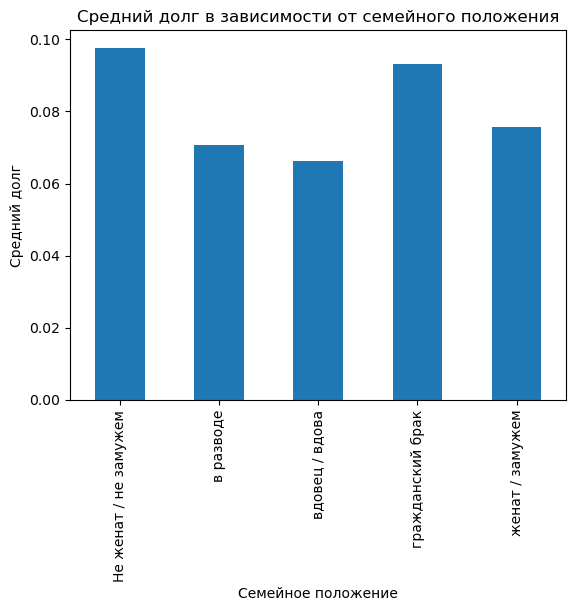

In [27]:
ax = data.groupby('family_status')['debt'].mean().plot(kind='bar')
ax.set_xlabel('Семейное положение')
ax.set_ylabel('Средний долг')
ax.set_title('Средний долг в зависимости от семейного положения');

**Вывод:** Вдовствующие и разведенные заемщики являются наиболее ответственными в плане погашения кредитов, но это и самые малочисленные категории заемщиков. Наибольшее количество должников в категориях неженатых/незамужних людей, и людей состоящих в гранжданском браке. Наиболее многочисленная категория заемщиков - люди, состоящие в браке - имеют средние позиции по количеству долников. 

#### Иследуем зависимость между уровнем дохода и возвратом кредита в срок.

In [28]:
data.groupby('total_income_category')['debt'].agg(['count', 'mean'])

,count,mean
total_income_category,,
A,25,0.080000
B,5014,0.070602
C,15921,0.084982
D,349,0.060172
E,22,0.090909


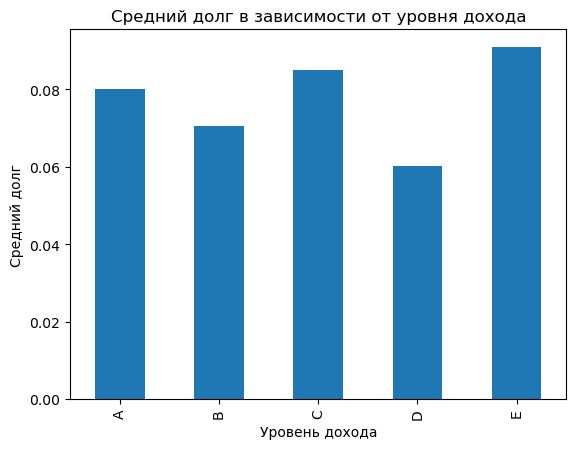

In [29]:
ax = data.groupby('total_income_category')['debt'].mean().plot(kind='bar')
ax.set_xlabel('Уровень дохода')
ax.set_ylabel('Средний долг')
ax.set_title('Средний долг в зависимости от уровня дохода');

**Вывод:** В данной выборке представлены пять категорий заемщиков, сформирорванных по уровню ежемесячного дохода. Категории А и Е очень малочисленные, поэтому ими можно пренебречь. Из графика видно, что заемщики с низким доходом (каегоря D) имеют наименьший процент должников. Самая многочисленная часть заемщиков(категория С), имеющая средний доход, является лидером по количеству должников. Каегория В - заемщики с высоким доходом, имеет среднее количество должников.

#### Посмотрим как разные цели кредита влияют на его возврат в срок?

In [30]:
data.groupby('purpose_category')['debt'].agg(['count', 'mean'])

,count,mean
purpose_category,,
операции с автомобилем,4279,0.093480
операции с недвижимостью,10751,0.072551
получение образования,3988,0.092528
проведение свадьбы,2313,0.079118


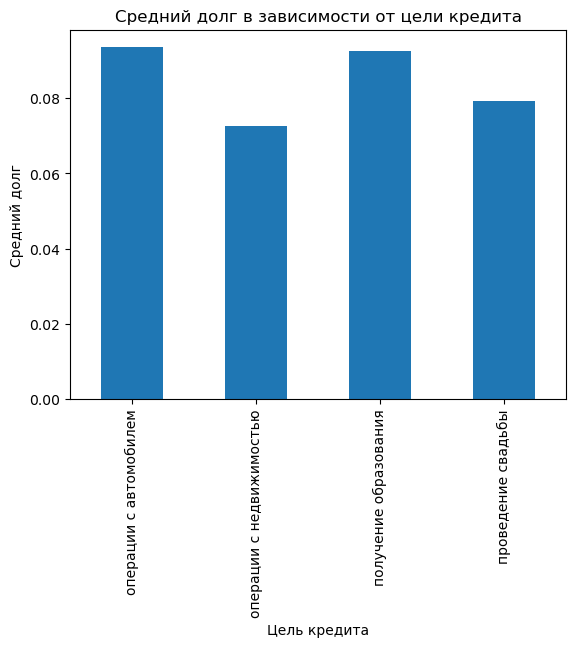

In [31]:
ax = data.groupby('purpose_category')['debt'].mean().plot(kind='bar')
ax.set_xlabel('Цель кредита')
ax.set_ylabel('Средний долг')
ax.set_title('Средний долг в зависимости от цели кредита');

**Вывод:** Самые ответственные заемщики - те, кто берет кредит на покупку или строительство недвижимости, это и самая многочисленная категория. Наибольшее количество должников в категориях "Операции с автомобилями" и " Получение образования". Самая малочисленная категория заемщиков "Проведение свадьбы" имеют средний процент должников.

Судя по данным таблицы люди не предоставили данные о подтвержденном месте работе работе и официальной зароботной плате. Эти люди или безработные, или работающие без официального оформления, или пенсионеры.

Медианные значения наиболее точно представлят усредненные показания, так как на них не влияют аномальные значения и единичные пиковые значения.

### Общий вывод.

По проведенным иследованиям по предоставленным данным нельзя четко разделить заемщиков по надежности. Можно условно выделить категории с наименьшей надежностью, это - люди никогда не бывшие в законном браке, имеющие детей, люди с наименьшим доходом, а также взявшие кредит на автомобиль и образование. В то же время нужно заметить, что для составления более точного портрета неплательщика не хватает таких данных как размер ранее выданных кредитов, срок кредитов и процентная ставка.